# Response Measurements

In [1]:
import sys

sys.path.append("../")

In [2]:
import os

from settings import dev as settings
from src.scan import scan_response_measurements
from src.scan.decorators import response_measurements, add_noise
from src.scan.utils import plot_meters_data, plot_motors_data, plot_response_matrix, clear_output
from src.elegant import eleget, eleput
from src.core import config as cfg

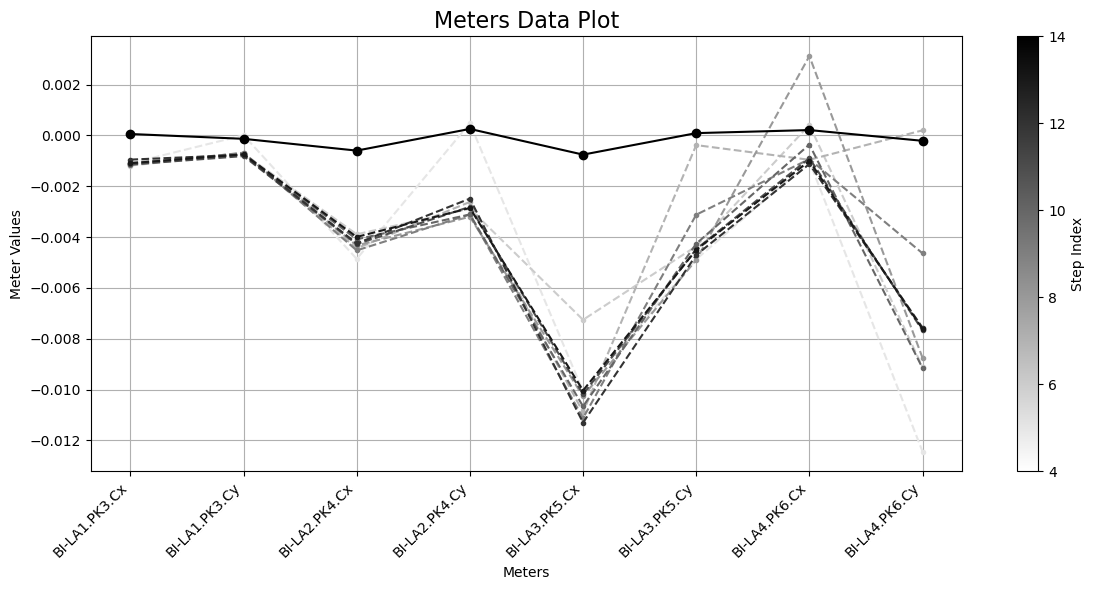

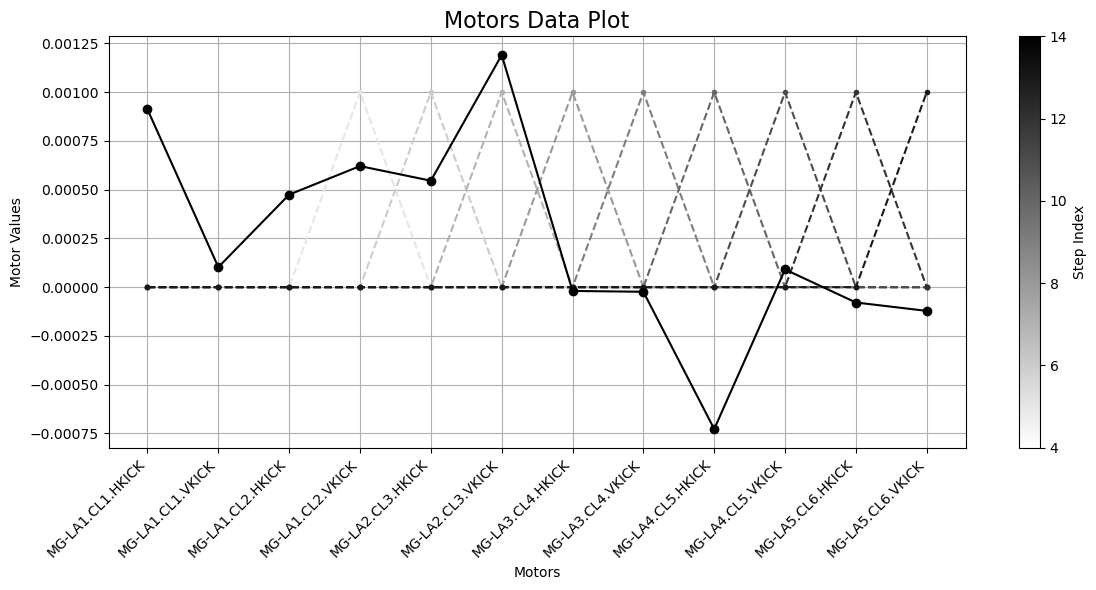

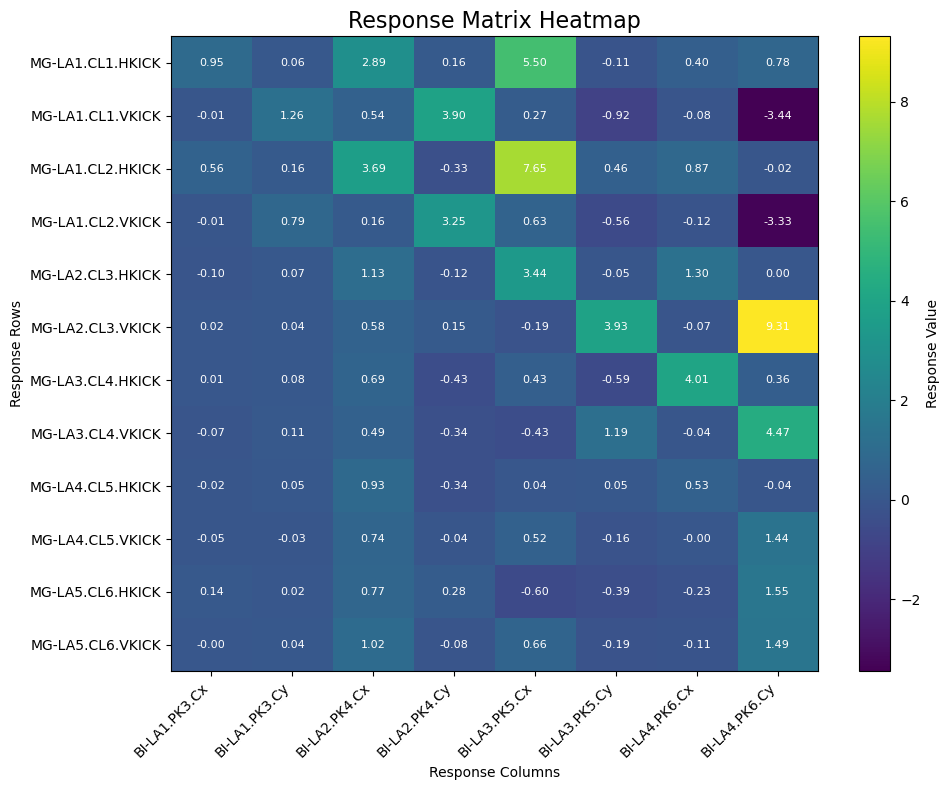

In [3]:
data_scan = scan_response_measurements(
    meters=settings.METERS, 
    motors=settings.MOTORS, 
    get_func=add_noise(settings.NOISE_LEVEL)(eleget), 
    put_func=eleput, 
    sample_size=settings.SAMPLE_SIZE,
    verify_motor=settings.VERIFY_MOTOR,
    max_retries=settings.MAX_TRIES,
    delay=settings.DELAY,
    tolerance=settings.TOLERANCE,
    save=settings.SAVE_SCAN,
    dirname=settings.DIRNAME_DATA,
    callback=[clear_output, plot_meters_data, plot_motors_data, plot_response_matrix], 
    save_original_motor_values=settings.SAVE_ORIGINAL_MOTOR_VALUES,
    parallel=settings.PARALLEL,
)

In [4]:
data_scan

{'data': {'MG-LA1.CL1.HKICK': {0.0009115781048195911: {'BI-LA1.PK3.Cx': 5.299441206472342e-05,
    'BI-LA1.PK3.Cy': -0.00013669130379338027,
    'BI-LA2.PK4.Cx': -0.0006002296478685766,
    'BI-LA2.PK4.Cy': 0.00025235062401915756,
    'BI-LA3.PK5.Cx': -0.0007585054686341842,
    'BI-LA3.PK5.Cy': 8.762320369524964e-05,
    'BI-LA4.PK6.Cx': 0.00020750976395204657,
    'BI-LA4.PK6.Cy': -0.00021489178370149515}},
  'MG-LA1.CL1.VKICK': {0.00010252939681841132: {'BI-LA1.PK3.Cx': 5.299441206472342e-05,
    'BI-LA1.PK3.Cy': -0.00013669130379338027,
    'BI-LA2.PK4.Cx': -0.0006002296478685766,
    'BI-LA2.PK4.Cy': 0.00025235062401915756,
    'BI-LA3.PK5.Cx': -0.0007585054686341842,
    'BI-LA3.PK5.Cy': 8.762320369524964e-05,
    'BI-LA4.PK6.Cx': 0.00020750976395204657,
    'BI-LA4.PK6.Cy': -0.00021489178370149515}},
  'MG-LA1.CL2.HKICK': {0.00047466140531056747: {'BI-LA1.PK3.Cx': 5.299441206472342e-05,
    'BI-LA1.PK3.Cy': -0.00013669130379338027,
    'BI-LA2.PK4.Cx': -0.0006002296478685766,
  